In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison    # For post-hoc Testing
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
%matplotlib inline

In [7]:
DF = pd.read_csv('Golfball.csv')

In [8]:
DF.head()

,Design,Distance
0,Design1,206.32
1,Design1,207.94
2,Design1,206.19
3,Design1,204.45
4,Design1,209.65


In [5]:
DF.describe()

,Distance
count,40.000000
mean,220.085000
std,9.697758
min,203.810000
25%,211.580000
50%,221.485000
75%,228.390000
max,235.450000


In [10]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Design      40 non-null category
Distance    40 non-null float64
dtypes: category(1), float64(1)
memory usage: 632.0 bytes


In [9]:
DF.Design = pd.Categorical(DF.Design)

In [16]:
DF['Design'].value_counts

<bound method IndexOpsMixin.value_counts of 0     Design1
1     Design1
2     Design1
3     Design1
4     Design1
5     Design1
6     Design1
7     Design1
8     Design1
9     Design1
10    Design2
11    Design2
12    Design2
13    Design2
14    Design2
15    Design2
16    Design2
17    Design2
18    Design2
19    Design2
20    Design3
21    Design3
22    Design3
23    Design3
24    Design3
25    Design3
26    Design3
27    Design3
28    Design3
29    Design3
30    Design4
31    Design4
32    Design4
33    Design4
34    Design4
35    Design4
36    Design4
37    Design4
38    Design4
39    Design4
Name: Design, dtype: category
Categories (4, object): [Design1, Design2, Design3, Design4]>

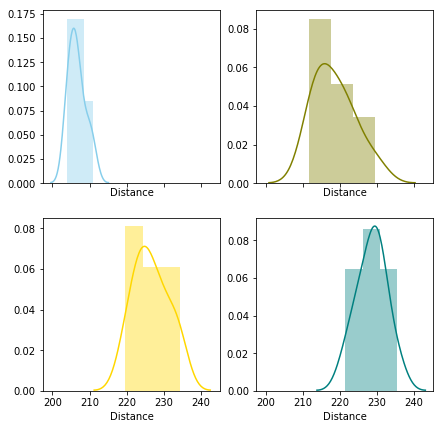

In [32]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( DF[DF['Design'] == "Design1"].Distance , color="skyblue", ax=axes[0, 0])
sns.distplot( DF[DF['Design'] == "Design2"].Distance , color="olive", ax=axes[0, 1])
sns.distplot( DF[DF['Design'] == "Design3"].Distance , color="gold", ax=axes[1, 0])
sns.distplot( DF[DF['Design'] == "Design4"].Distance , color="teal", ax=axes[1, 1])

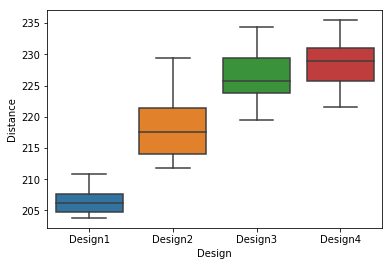

In [33]:
sns.boxplot(x='Design', y='Distance', data=DF)

In [34]:
formula = 'Distance ~ C(Design)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

             df     sum_sq     mean_sq          F        PR(>F)
C(Design)   3.0  2990.9898  996.996600  53.029822  2.731991e-13
Residual   36.0   676.8244   18.800678        NaN           NaN


/Users/gurumoorthypattabiraman/miniconda3/envs/myenv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/gurumoorthypattabiraman/miniconda3/envs/myenv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/gurumoorthypattabiraman/miniconda3/envs/myenv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [35]:
mc = MultiComparison(DF['Distance'], DF['Design'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower   upper  reject
-----------------------------------------------
Design1 Design2  11.902   6.6795 17.1245  True 
Design1 Design3  19.974  14.7515 25.1965  True 
Design1 Design4  22.008  16.7855 27.2305  True 
Design2 Design3  8.072    2.8495 13.2945  True 
Design2 Design4  10.106   4.8835 15.3285  True 
Design3 Design4  2.034   -3.1885  7.2565 False 
-----------------------------------------------
['Design1' 'Design2' 'Design3' 'Design4']
